In [1]:
library(grid)
library(ggplot2)
library(caret)
library(glmnet)

Loading required package: lattice
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [2]:
set.seed(1)

In [3]:
valuables <- c("RoadType", "TimeToCollision", "CurveAverage","Speed","MaxSpeed","RiskFactor","Curve","DistSignal","Pitch","AheadDistance","AverageVelocity","TimeToCollision","AccelerationSpeed","LaneCount","Engine","SteeringAngle")

In [4]:
printf <- function(...) cat(sprintf(...))

In [5]:
CV <- function(dfx, verbose=FALSE) {        
    folds <- createFolds(dfx$flag)
    
    count <- 1
    errs <- c()
    reds <- c()
    blues <- c()
    for (ids in folds) {
        train <- dfx[-ids, ]
        test <- dfx[ids, ]
        fit <- glmnet(x=as.matrix(train[,valuables]), y=train[,"flag"], alpha=1, family="binomial")
        p <- predict(fit, newx=as.matrix(test[,valuables]), type="class", s=0.008)
        
        if (verbose) {            
            printf("Fold%d\n", count)
            result <- correctVsPredict(test, p)
            reds <- c(reds, result[1])
            blues <- c(blues, result[2])
            count <- count + 1
            printf("\n")
        }
        
        nerr <- sum((p == test$flag) == FALSE)
        errs <- c(errs, nerr / nrow(test))
    }
    
    return(c(mean(errs), mean(reds), mean(blues)))
}

In [6]:
correctVsPredict <- function(test, predictedFlags) {    
    # for All
    # nTests <- nrow(test)
    # nCorrectAll <- sum((predictedFlags == test$flag) == TRUE)
    # printf("As fo All: correct/all = %d/%d = %f\n", nCorrectAll, nTests, nCorrectAll / nTests)
    
    # for Red
    predictedRedRows <- test[predictedFlags == "Red", ]
    nCorrectReds <- sum((predictedRedRows$flag == 'Red') == TRUE)
    nPredictedReds <- nrow(predictedRedRows)
    printf("As for Red: correct/predict = %d/%d = %f\n", nCorrectReds, nPredictedReds, nCorrectReds / nPredictedReds)
    
    # for Blue
    predictedBlueRows <- test[predictedFlags == "Blue", ]
    nCorrectBlues <- sum((predictedBlueRows$flag == 'Blue') == TRUE)
    nPredictedBlues <- nrow(predictedBlueRows)
    printf("As for Blue: correct/predict = %d/%d = %f\n", nCorrectBlues, nPredictedBlues, nCorrectBlues / nPredictedBlues)
    
    c(nCorrectReds/nPredictedReds, nCorrectBlues/nPredictedBlues)
}

In [7]:
printRedRatios <- function(dfx) {
    nRed <- nrow(dfx[dfx$flag == "Red", ])
    nAll <- nrow(dfx)
    printf("Red/All = %d/%d = %f\n", nRed, nAll, nRed/nAll)
    printf("1 - Red/All = %d/%d = %f\n", nAll - nRed, nAll, 1 - nRed/nAll)
}

# Predict Red


In [8]:
df <- read.csv("../data/middle/sp4.csv", stringsAsFactors=FALSE)

In [9]:
df$flag[df$flag == "RedA"] <- "Red"
df$flag[df$flag == "RedB"] <- "Red"
df$flag[df$flag == "BlueA"] <- "Blue"
df$flag[df$flag == "BlueB"] <- "Blue"
df$flag <- as.factor(df$flag)

In [10]:
result <- CV(df, verbose=TRUE)
printRedRatios(df)
printf("Red: Mean correct/predict = %f\n", result[2])
printf("Blue: Mean correct/predict = %f\n", result[3])
printf("CV value: %f", result[1])

Fold1
As for Red: correct/predict = 48/77 = 0.623377
As for Blue: correct/predict = 15/27 = 0.555556

Fold2
As for Red: correct/predict = 49/83 = 0.590361
As for Blue: correct/predict = 11/22 = 0.500000

Fold3
As for Red: correct/predict = 48/86 = 0.558140
As for Blue: correct/predict = 7/18 = 0.388889

Fold4
As for Red: correct/predict = 52/90 = 0.577778
As for Blue: correct/predict = 7/14 = 0.500000

Fold5
As for Red: correct/predict = 50/86 = 0.581395
As for Blue: correct/predict = 9/18 = 0.500000

Fold6
As for Red: correct/predict = 49/82 = 0.597561
As for Blue: correct/predict = 12/22 = 0.545455

Fold7
As for Red: correct/predict = 49/82 = 0.597561
As for Blue: correct/predict = 12/23 = 0.521739

Fold8
As for Red: correct/predict = 49/79 = 0.620253
As for Blue: correct/predict = 15/25 = 0.600000

Fold9
As for Red: correct/predict = 49/85 = 0.576471
As for Blue: correct/predict = 9/19 = 0.473684

Fold10
As for Red: correct/predict = 55/90 = 0.611111
As for Blue: correct/predict = 1

In [11]:
cv.glmmod <- cv.glmnet(x=as.matrix(df[, valuables]), y=df[, "flag"], alpha=1, family="binomial")

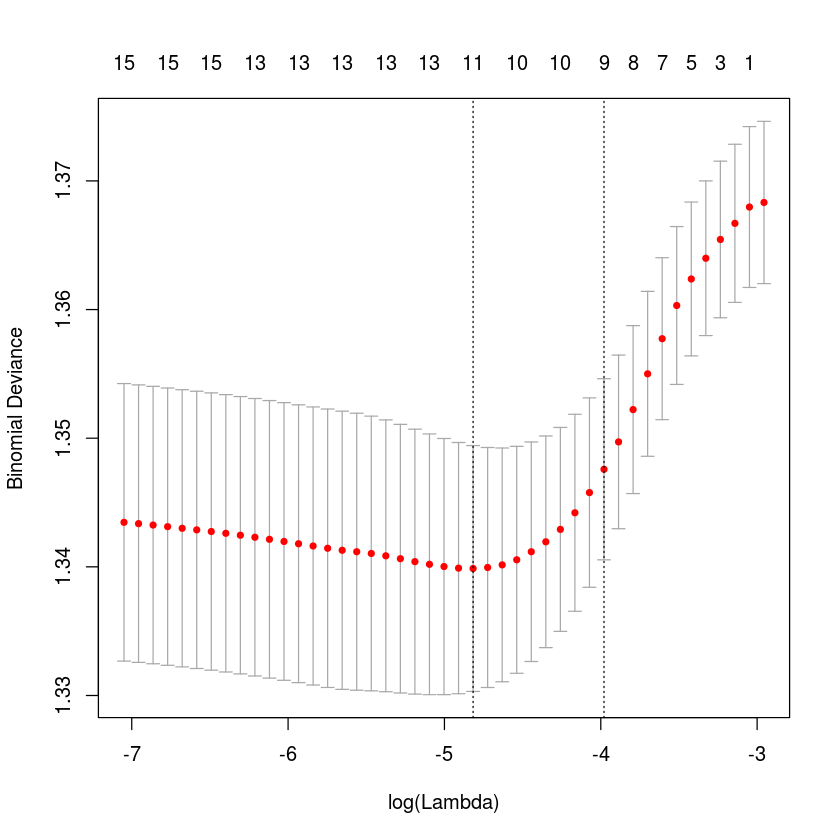

In [12]:
plot(cv.glmmod)

In [13]:
cv.glmmod$lambda.min

[1] 0.008093415